In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('mental_health_dataset_bangla.xlsx')

In [3]:
df.head()

,Description,Mental_State
0,প্রতি একক দিনে প্রচুর পরিমাণে ভোজ্য এবং জিনি...,Addiction
1,আমার ভাইয়েরা গত ৫ বছর ধরে হেরোইন/মেথের শুটিং ...,Addiction
2,আমি মিডল স্কুলে ৮ম শ্রেণী থেকে আগাছা ধূমপান কর...,Addiction
3,"আমি অন্টারিও, কানাডার একজন সাংবাদিকতার ছাত্র।...",Addiction
4,চিন্তা করবেন না আমি এই বিষয়ে কতটা পোস্ট করি আ...,Addiction


In [4]:
df.tail()

,Description,Mental_State
10282,প্যাটেলদের জন্য আপনার চিন্তা কি রিজার্ভেশন,Neutral
10283,কেউ কি দয়া করে সাহায্য করতে পারেন কিভাবে ডান্...,Neutral
10284,ভাই প্রকৃত সুবিধাভোগীরা ইন্টারনেট ব্যবহার করে...,Neutral
10285,দিল্লি চন্ডিগড় তৈরি করা হয়েছিল বছরের পর বছর...,Neutral
10286,"আগে কেউ সরকারের সমালোচনা করতে পারত না, দেশবির...",Neutral


In [5]:
df.dropna(inplace=True)

In [6]:
df["Mental_State"].value_counts()

Neutral             1002
Suicidal Thought    1001
Bipolar             1000
BPD                  995
Anxiety              991
Schizophrenia        988
Alcoholism           986
Depression           943
Addiction            921
Aspergers            789
Self Harm            671
Name: Mental_State, dtype: int64

In [7]:
text = df['Description'].values.tolist()
label = df['Mental_State'].tolist()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text , label, test_size=0.2, random_state=42)

In [9]:
import ktrain
from ktrain import text
MODEL_NAME = 'xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=500)


In [11]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 134
	95percentile : 386
	99percentile : 672


C:\Users\moshi\anaconda3\lib\site-packages\ktrain\utils.py:621: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 133
	95percentile : 391
	99percentile : 692


In [12]:
model = t.get_classifier()

In [13]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

In [14]:
history = learner.fit_onecycle(2e-5, 10)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1372/1372 [==============================] - 16139s 12s/step - loss: 2.0713 - accuracy: 0.2825 - val_loss: 1.4909 - val_accuracy: 0.5583
Epoch 2/10
1372/1372 [==============================] - 16129s 12s/step - loss: 1.2747 - accuracy: 0.6233 - val_loss: 1.0944 - val_accuracy: 0.6808
Epoch 3/10
1372/1372 [==============================] - 16112s 12s/step - loss: 0.9570 - accuracy: 0.7114 - val_loss: 0.9319 - val_accuracy: 0.7143
Epoch 4/10
1372/1372 [==============================] - 16127s 12s/step - loss: 0.8201 - accuracy: 0.7506 - val_loss: 0.9133 - val_accuracy: 0.7323
Epoch 5/10
1372/1372 [==============================] - 16102s 12s/step - loss: 0.6820 - accuracy: 0.7907 - val_loss: 0.9249 - val_accuracy: 0.7376
Epoch 6/10
1372/1372 [==============================] - 16147s 12s/step - loss: 0.5741 - accuracy: 0.8177 - val_loss: 0.8634 - val_accuracy: 0.7575
Epoch 7/10
1372/1372 [===========================

In [15]:
learner.validate(class_names=t.get_classes()) 

                  precision    recall  f1-score   support

       Addiction       0.82      0.80      0.81       200
      Alcoholism       0.84      0.88      0.86       202
         Anxiety       0.68      0.81      0.74       183
       Aspergers       0.78      0.72      0.75       160
             BPD       0.74      0.63      0.68       216
         Bipolar       0.77      0.73      0.75       203
      Depression       0.63      0.66      0.65       182
         Neutral       0.94      0.92      0.93       184
   Schizophrenia       0.73      0.78      0.75       190
       Self Harm       0.76      0.77      0.77       146
Suicidal Thought       0.75      0.73      0.74       192

        accuracy                           0.77      2058
       macro avg       0.77      0.77      0.77      2058
    weighted avg       0.77      0.77      0.77      2058



array([[159,  14,   8,   5,   1,   5,   3,   0,   1,   2,   2],
       [ 11, 178,   2,   1,   3,   0,   1,   0,   1,   3,   2],
       [  2,   4, 148,   2,   6,   4,   5,   0,   8,   3,   1],
       [  4,   4,   6, 116,   9,   1,   4,   0,  10,   6,   0],
       [  5,   2,  14,   4, 136,  12,  15,   1,  12,   6,   9],
       [  4,   1,  10,   3,   6, 149,  13,   0,  11,   1,   5],
       [  0,   1,  11,   2,  11,   5, 121,   3,   6,   4,  18],
       [  1,   0,   1,   0,   0,   3,   2, 169,   1,   5,   2],
       [  3,   2,  10,   6,   3,  10,   4,   0, 148,   1,   3],
       [  2,   5,   4,   7,   2,   1,   0,   5,   2, 113,   5],
       [  3,   0,   4,   2,   7,   3,  23,   1,   3,   5, 141]],
      dtype=int64)

In [16]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend() 

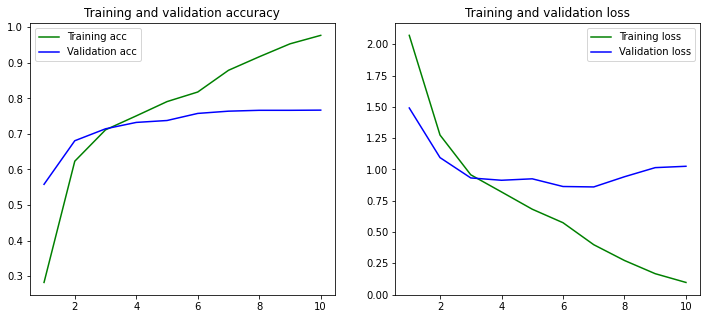

In [17]:
PlotGraph(history)

In [18]:
predictor=ktrain.get_predictor(learner.model, preproc=t)

In [19]:
predictor.predict(" প্রতি একক দিনে প্রচুর পরিমাণে  ভোজ্য এবং জিনিসপত্র পাওয়া যাচ্ছে। আমি শুধুমাত্র সপ্তাহান্তে এটা করতে শুরু করেছি কিন্তু আমি এটা করতেই থাকলাম। আজকে কি আমার প্রথম দিন বেশি হবে না?কারণ আমি এলোমেলো বড়ি খাওয়া শুরু করেছিলাম, এবং গতকাল আমি উচ্চ পাওয়ার জন্য এক বোতল কাশির সিরাপ পান করেছি। এটা? আমি উচ্চ হতে চাই মত. এবং আমি খুব বিরক্ত বোধ করি এবং অন্যরা আমাকে কী ভাবছে তা আমি সত্যিই চিন্তা করি না? আমি বিএস-এ ক্লান্ত। ")

'Alcoholism'

In [20]:
predictor.explain(" প্রতি একক দিনে প্রচুর পরিমাণে  ভোজ্য এবং জিনিসপত্র পাওয়া যাচ্ছে। আমি শুধুমাত্র সপ্তাহান্তে এটা করতে শুরু করেছি কিন্তু আমি এটা করতেই থাকলাম। আজকে কি আমার প্রথম দিন বেশি হবে না?কারণ আমি এলোমেলো বড়ি খাওয়া শুরু করেছিলাম, এবং গতকাল আমি উচ্চ পাওয়ার জন্য এক বোতল কাশির সিরাপ পান করেছি। এটা? আমি উচ্চ হতে চাই মত. এবং আমি খুব বিরক্ত বোধ করি এবং অন্যরা আমাকে কী ভাবছে তা আমি সত্যিই চিন্তা করি না? আমি বিএস-এ ক্লান্ত। ")